In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchwisdom.tabular.trainer import classifier_trainer
from torchwisdom.tabular.capsule import categorical_data
from torchwisdom.tabular.predictor import TabularClassifierPredictor
from torchwisdom.core.callback import *

In [3]:
data = categorical_data('data/iris.csv', target_columns='classes', batch_size=32,
                        use_normalization = True, normalization_mode = 'minmax')

In [4]:
model = nn.Sequential(
    nn.Linear(4, 64),
    nn.ReLU(),
    nn.BatchNorm1d(64),
    nn.Linear(64, 128),
    nn.ReLU(),
    nn.BatchNorm1d(128),
    nn.Linear(128, 3)
)

In [5]:
trainer = classifier_trainer(data, model)

epoch,trn_loss,val_loss,trn_acc,val_acc,time,remain
1,0.074469,0.126264,98.177078,96.666664,0:00:00.13,0:00:01.21
2,0.064680,0.123234,98.437500,96.666664,0:00:00.21,0:00:01.80
3,0.065148,0.118310,98.437500,96.666664,0:00:00.17,0:00:01.23
4,0.055842,0.112959,99.218750,96.666664,0:00:00.17,0:00:01.06
5,0.066620,0.109187,97.395828,96.666664,0:00:00.16,0:00:00.81
6,0.062019,0.112202,97.656250,96.666664,0:00:00.15,0:00:00.48
7,0.052216,0.118412,98.177078,96.666664,0:00:00.19,0:00:00.70
8,0.088581,0.108172,95.833328,100.000000,0:00:00.16,0:00:00.23
9,0.043821,0.110878,99.218750,96.666664,0:00:00.18,0:00:00.30
10,0.065897,0.111174,98.437500,96.666664,0:00:00.16,0:0


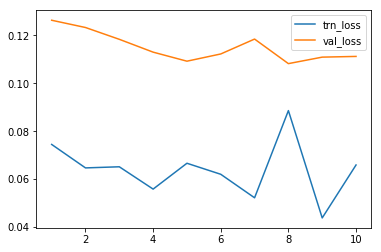

In [7]:
trainer.resumeable(True)
trainer.save_best(True, metric="val_acc", mode="max")
trainer.fit(10, lr=0.001)

In [8]:
feat, targ = data.validset.sample(10, use_transform=False)

In [9]:
trainer.predict(feature=feat, target=targ, show_table=True)

,sepal_length,sepal_width,petal_length,petal_width,classes_truth,classes_predict
0,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa
1,6.4,3.2,4.5,1.5,Iris-versicolor,Iris-versicolor
2,4.6,3.4,1.4,0.3,Iris-setosa,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
4,5.8,2.7,5.1,1.9,Iris-virginica,Iris-virginica
5,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
6,6.2,2.9,4.3,1.3,Iris-versicolor,Iris-versicolor
7,5.4,3.4,1.7,0.2,Iris-setosa,Iris-setosa
8,5.7,4.4,1.5,0.4,Iris-setosa,Iris-setosa
9,7.1,3.0,5.9,2.1,Iris-virginica,Iris-virginica


In [10]:
trainer.export('export/iris_export.pth')

In [13]:
from torchwisdom.tabular.capsule import categorical_data
from torchwisdom.tabular.predictor import TabularClassifierPredictor

data = categorical_data('data/iris.csv', target_columns='classes', batch_size=32,
                        use_normalization = True, normalization_mode = 'minmax')

feat, targ = data.validset.sample(10, shuffle=True, use_transform=False)

file_path = "export/iris_export.pth"
pred = TabularClassifierPredictor(file_path)
pred.predict(feature=feat, target=targ, show_table=True)

,sepal_length,sepal_width,petal_length,petal_width,classes_truth,classes_predict
0,4.4,3.0,1.3,0.2,Iris-setosa,Iris-setosa
1,4.8,3.0,1.4,0.1,Iris-setosa,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
3,5.5,2.6,4.4,1.2,Iris-versicolor,Iris-versicolor
4,6.0,3.0,4.8,1.8,Iris-virginica,Iris-virginica
5,5.8,2.7,5.1,1.9,Iris-virginica,Iris-virginica
6,4.6,3.4,1.4,0.3,Iris-setosa,Iris-setosa
7,7.1,3.0,5.9,2.1,Iris-virginica,Iris-virginica
8,6.5,3.0,5.5,1.8,Iris-virginica,Iris-virginica
9,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa
